In [1]:
import statsmodels
print(statsmodels.__file__)


c:\Users\Devra\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\__init__.py


In [2]:
# Standard
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Time-series modeling

import statsmodels.api as sm
import pmdarima as pm

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math


In [4]:
import pandas as pd

# Load dataset with correct date column
df = pd.read_csv(
    r"C:\Users\Devra\Wind_energy_prediction\Data\T1.csv",
    parse_dates=['Date/Time'],
    index_col='Date/Time'
)
df.columns = [
    'ActivePower_kW',
    'WindSpeed_mps',
    'TheoreticalPowerCurve_kWh',
    'WindDirection_deg'
]

print("\nRenamed columns:\n", df.columns.tolist())


# Preview
print(df.head())
print("\nShape:", df.shape)
print("\nData types:\n", df.dtypes)






Renamed columns:
 ['ActivePower_kW', 'WindSpeed_mps', 'TheoreticalPowerCurve_kWh', 'WindDirection_deg']
                  ActivePower_kW  WindSpeed_mps  TheoreticalPowerCurve_kWh  \
Date/Time                                                                    
01 01 2018 00:00      380.047791       5.311336                 416.328908   
01 01 2018 00:10      453.769196       5.672167                 519.917511   
01 01 2018 00:20      306.376587       5.216037                 390.900016   
01 01 2018 00:30      419.645905       5.659674                 516.127569   
01 01 2018 00:40      380.650696       5.577941                 491.702972   

                  WindDirection_deg  
Date/Time                            
01 01 2018 00:00         259.994904  
01 01 2018 00:10         268.641113  
01 01 2018 00:20         272.564789  
01 01 2018 00:30         271.258087  
01 01 2018 00:40         265.674286  

Shape: (50530, 4)

Data types:
 ActivePower_kW               float64
WindSpeed_mp

In [5]:
# Fix datetime parsing manually
df.index = pd.to_datetime(df.index, format='%d %m %Y %H:%M')

# Verify
print("Datetime index fixed ✅")
print(df.index[:5])


Datetime index fixed ✅
DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:10:00',
               '2018-01-01 00:20:00', '2018-01-01 00:30:00',
               '2018-01-01 00:40:00'],
              dtype='datetime64[ns]', name='Date/Time', freq=None)


In [6]:
# Resample to hourly mean
df_hourly = df.resample('H').mean()

print("\nHourly data shape:", df_hourly.shape)
print(df_hourly.head())



Hourly data shape: (8760, 4)
                     ActivePower_kW  WindSpeed_mps  TheoreticalPowerCurve_kWh  \
Date/Time                                                                       
2018-01-01 00:00:00      390.480362       5.506868                 472.402227   
2018-01-01 01:00:00      460.537125       5.644205                 513.418408   
2018-01-01 02:00:00      733.655375       6.452037                 788.401310   
2018-01-01 03:00:00      909.362081       6.811455                 948.793346   
2018-01-01 04:00:00     1393.518188       7.748749                1406.391795   

                     WindDirection_deg  
Date/Time                               
2018-01-01 00:00:00         267.118632  
2018-01-01 01:00:00         258.945546  
2018-01-01 02:00:00         268.397466  
2018-01-01 03:00:00         256.014765  
2018-01-01 04:00:00         247.652468  


C:\Users\Devra\AppData\Local\Temp\ipykernel_9536\3149182278.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df.resample('H').mean()


In [7]:
# Fill missing values with interpolation
df_hourly = df_hourly.interpolate(method='linear')

print("\nMissing values per column:\n", df_hourly.isna().sum())



Missing values per column:
 ActivePower_kW               0
WindSpeed_mps                0
TheoreticalPowerCurve_kWh    0
WindDirection_deg            0
dtype: int64


In [8]:
# Save processed data
output_path = r"C:\Users\Devra\Wind_energy_prediction\Results\processed_hourly.csv"
df_hourly.to_csv(output_path)
print(f"\n✅ Clean hourly dataset saved to: {output_path}")



✅ Clean hourly dataset saved to: C:\Users\Devra\Wind_energy_prediction\Results\processed_hourly.csv


In [9]:
# Step 3.1 — Import libraries and load the processed hourly dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# ✅ Load your hourly-averaged dataset
df = pd.read_csv(
    r"C:/Users/Devra/Wind_energy_prediction/Results/processed_hourly.csv",
    index_col=0,
    parse_dates=True
)

# Show info
print(df.head())
print("\nData shape:", df.shape)
print("\nData types:\n", df.dtypes)


                     ActivePower_kW  WindSpeed_mps  TheoreticalPowerCurve_kWh  \
Date/Time                                                                       
2018-01-01 00:00:00      390.480362       5.506868                 472.402227   
2018-01-01 01:00:00      460.537125       5.644205                 513.418408   
2018-01-01 02:00:00      733.655375       6.452037                 788.401310   
2018-01-01 03:00:00      909.362081       6.811455                 948.793346   
2018-01-01 04:00:00     1393.518188       7.748749                1406.391795   

                     WindDirection_deg  
Date/Time                               
2018-01-01 00:00:00         267.118632  
2018-01-01 01:00:00         258.945546  
2018-01-01 02:00:00         268.397466  
2018-01-01 03:00:00         256.014765  
2018-01-01 04:00:00         247.652468  

Data shape: (8760, 4)

Data types:
 ActivePower_kW               float64
WindSpeed_mps                float64
TheoreticalPowerCurve_kWh    float

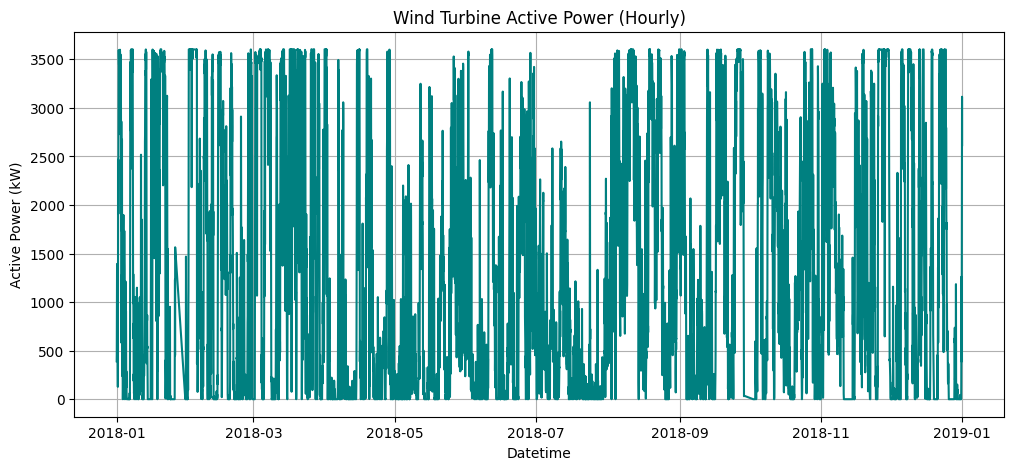

In [10]:
# Step 3.2 — Select target column
target_col = 'ActivePower_kW'
ts = df[target_col]

# Visualize the time series
plt.figure(figsize=(12,5))
plt.plot(ts, color='teal')
plt.title("Wind Turbine Active Power (Hourly)")
plt.xlabel("Datetime")
plt.ylabel("Active Power (kW)")
plt.grid(True)
plt.show()


Training data: (7008,)
Testing data: (1752,)


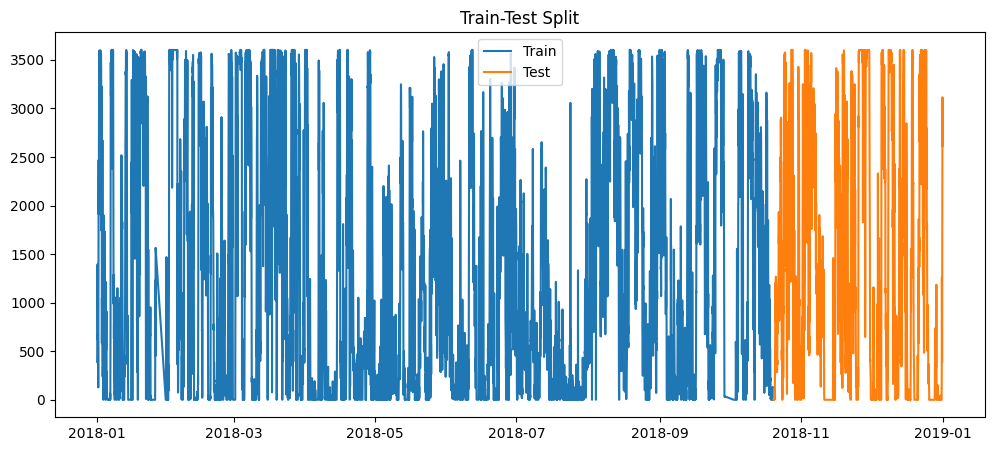

In [11]:
# Step 3.3 — Train-test split
split = int(len(ts) * 0.8)
train, test = ts[:split], ts[split:]

print("Training data:", train.shape)
print("Testing data:", test.shape)

plt.figure(figsize=(12,5))
plt.plot(train, label="Train")
plt.plot(test, label="Test")
plt.title("Train-Test Split")
plt.legend()
plt.show()


In [12]:
# Step 3.4 — Check stationarity
from statsmodels.tsa.stattools import adfuller

result = adfuller(train)
print("ADF Statistic:", result[0])
print("p-value:", result[1])

if result[1] > 0.05:
    print("\n⚠️ Series is not stationary. Differencing will be applied.")
    train_diff = train.diff().dropna()
else:
    print("\n✅ Series is stationary.")
    train_diff = train.copy()


ADF Statistic: -10.729305821805184
p-value: 3.0083813113711024e-19

✅ Series is stationary.


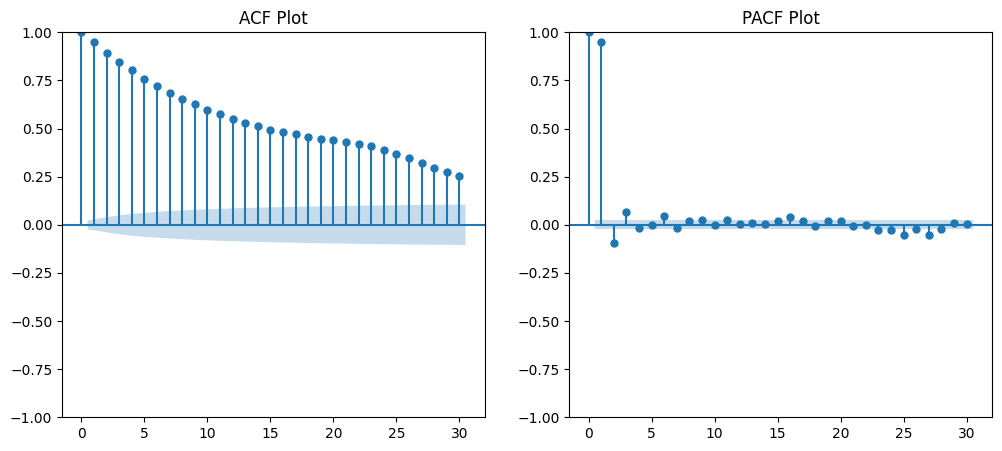

In [13]:
# Step 3.5 — ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(1,2, figsize=(12,5))
plot_acf(train_diff, lags=30, ax=ax[0])
plot_pacf(train_diff, lags=30, ax=ax[1])
ax[0].set_title("ACF Plot")
ax[1].set_title("PACF Plot")
plt.show()


In [14]:
# Step 3.6 — Fit ARIMA model
model = ARIMA(train, order=(2,1,2))
model_fit = model.fit()
print(model_fit.summary())


c:\Users\Devra\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
c:\Users\Devra\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
c:\Users\Devra\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:         ActivePower_kW   No. Observations:                 7008
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -51806.156
Date:                Wed, 05 Nov 2025   AIC                         103622.313
Time:                        23:07:04   BIC                         103656.586
Sample:                    01-01-2018   HQIC                        103634.122
                         - 10-19-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6299      0.059     10.673      0.000       0.514       0.746
ar.L2          0.2909      0.056      5.151      0.000       0.180       0.402
ma.L1         -0.5785      0.058    -10.017      0.0

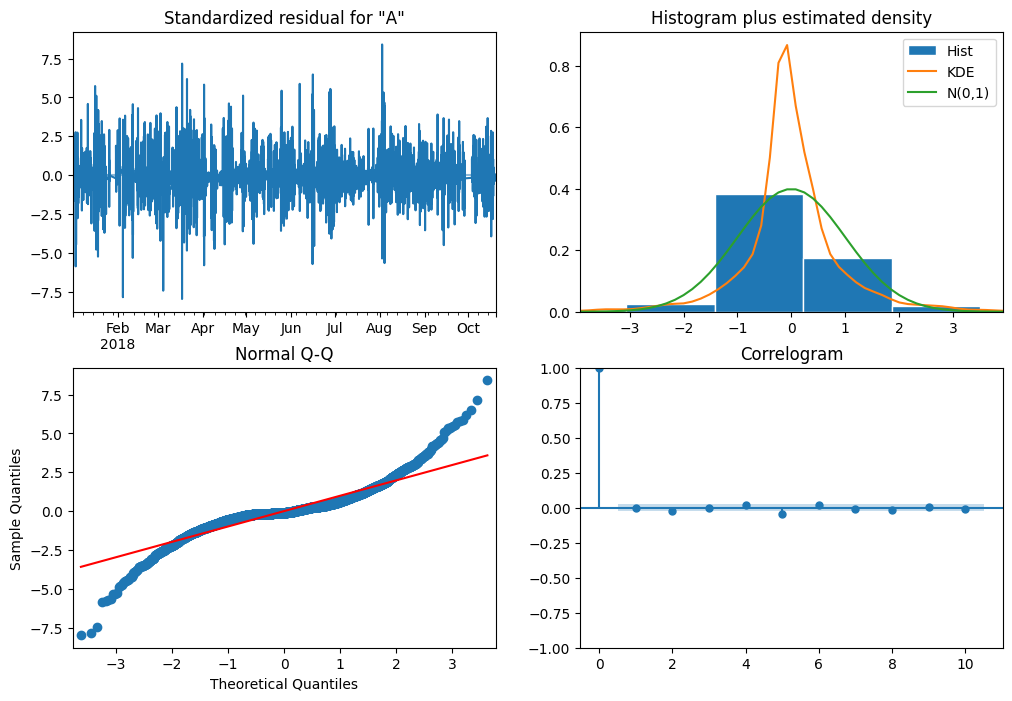

In [15]:
# Step 3.7 — Diagnostic plots
model_fit.plot_diagnostics(figsize=(12,8))
plt.show()


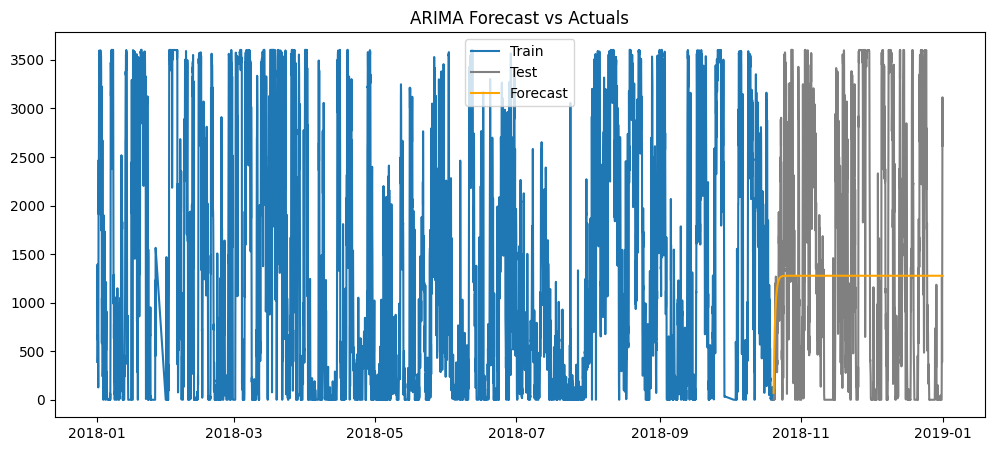

In [16]:
# Step 3.8 — Forecast
forecast = model_fit.forecast(steps=len(test))
forecast = pd.Series(forecast, index=test.index)

# Plot comparison
plt.figure(figsize=(12,5))
plt.plot(train, label='Train')
plt.plot(test, label='Test', color='gray')
plt.plot(forecast, label='Forecast', color='orange')
plt.title("ARIMA Forecast vs Actuals")
plt.legend()
plt.show()


In [17]:
# Step 3.9 — Model evaluation
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
mape = np.mean(np.abs((test - forecast) / test)) * 100

print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"MAPE : {mape:.2f}%")
 

MAE  : 1152.78
RMSE : 1330.06
MAPE : inf%


C:\Users\Devra\AppData\Local\Temp\ipykernel_9536\926616972.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  future_index = pd.date_range(last_date, periods=future_steps+1, freq='H')[1:]


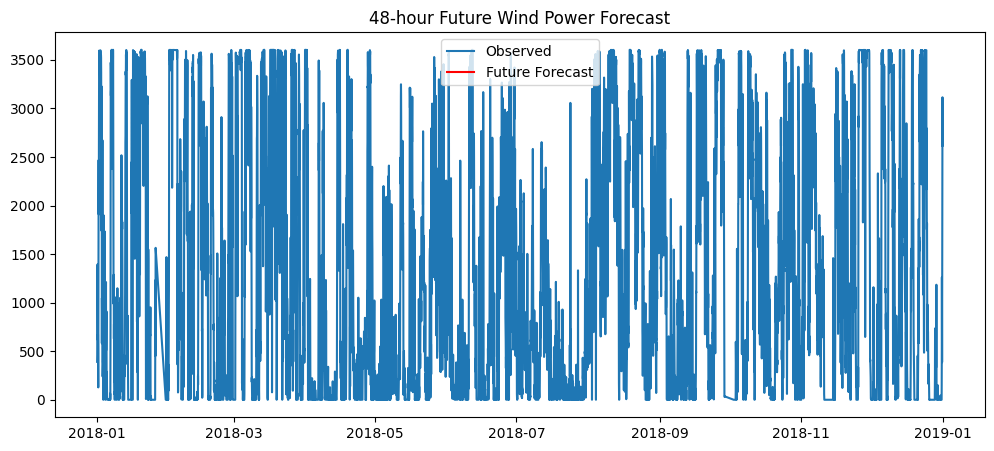

In [18]:
# Step 3.10 — Forecast next 48 hours
future_steps = 48
future_forecast = model_fit.forecast(steps=future_steps)

# Create future datetime index
last_date = df.index[-1]
future_index = pd.date_range(last_date, periods=future_steps+1, freq='H')[1:]
future_series = pd.Series(future_forecast, index=future_index)

plt.figure(figsize=(12,5))
plt.plot(ts, label='Observed')
plt.plot(future_series, label='Future Forecast', color='red')
plt.title("48-hour Future Wind Power Forecast")
plt.legend()
plt.show()


In [19]:
# Step 3.11 — Save ARIMA Model and Forecasts
import joblib
import numpy as np
import os

# Create models & results folders if not already created
os.makedirs(r"C:\Users\Devra\Wind_energy_prediction\Models", exist_ok=True)
os.makedirs(r"C:\Users\Devra\Wind_energy_prediction\Results", exist_ok=True)

# Save trained ARIMA model
joblib.dump(model_fit, r"C:\Users\Devra\Wind_energy_prediction\Models\arima_model.pkl")
print("✅ ARIMA model saved successfully as arima_model.pkl")

# Save forecasts
np.save(r"C:\Users\Devra\Wind_energy_prediction\Results\arima_forecast.npy", forecast)
np.save(r"C:\Users\Devra\Wind_energy_prediction\Results\arima_future_forecast.npy", future_series)
print("✅ Forecasts saved successfully as .npy files")


✅ ARIMA model saved successfully as arima_model.pkl
✅ Forecasts saved successfully as .npy files


In [20]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import joblib, os

# Load data
data = pd.read_csv("C:/Users/Devra/Wind_energy_prediction/data/T1.csv")

# Convert Date/Time to datetime and set index
data['Date/Time'] = pd.to_datetime(data['Date/Time'], format='%d %m %Y %H:%M')
data.set_index('Date/Time', inplace=True)

# Choose the target variable — pick one:
target_column = 'LV ActivePower (kW)'   # or 'Wind Speed (m/s)'

# Create the time series
wind_series = data[target_column]

# Train-test split
train_size = int(len(wind_series) * 0.8)
train_data, test_data = wind_series[:train_size], wind_series[train_size:]

# Fit ARIMA model
model = ARIMA(train_data, order=(5,1,0))
arima_model = model.fit()

# Save the model
os.makedirs("C:/Users/Devra/Wind_energy_prediction/results", exist_ok=True)
joblib.dump(arima_model, "C:/Users/Devra/Wind_energy_prediction/results/arima_model.pkl")

print("✅ ARIMA model trained and saved successfully at:")
print("C:/Users/Devra/Wind_energy_prediction/results/arima_model.pkl")


c:\Users\Devra\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Devra\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Devra\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


✅ ARIMA model trained and saved successfully at:
C:/Users/Devra/Wind_energy_prediction/results/arima_model.pkl


In [21]:
print(arima_model.summary())


                                SARIMAX Results                                
Dep. Variable:     LV ActivePower (kW)   No. Observations:                40424
Model:                  ARIMA(5, 1, 0)   Log Likelihood             -279799.622
Date:                 Wed, 05 Nov 2025   AIC                         559611.244
Time:                         23:07:15   BIC                         559662.886
Sample:                              0   HQIC                        559627.582
                               - 40424                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0053      0.002     -2.651      0.008      -0.009      -0.001
ar.L2         -0.1107      0.002    -48.740      0.000      -0.115      -0.106
ar.L3         -0.0584      0.002    -27.169 

In [22]:
import numpy as np
import os

# Create results directory if it doesn't exist
os.makedirs(r"C:\Users\Devra\Wind_energy_prediction\Results", exist_ok=True)

# Save both forecast versions (if available)
try:
    np.save(r"C:\Users\Devra\Wind_energy_prediction\Results\arima_forecast.npy", forecast)
    print("✅ Saved ARIMA test forecast as arima_forecast.npy")
except NameError:
    print("⚠️ 'forecast' variable not found in memory — skip saving test forecast.")

try:
    np.save(r"C:\Users\Devra\Wind_energy_prediction\Results\arima_future_forecast.npy", future_series)
    print("✅ Saved ARIMA 48-hour future forecast as arima_future_forecast.npy")
except NameError:
    print("⚠️ 'future_series' variable not found in memory — skip saving future forecast.")


✅ Saved ARIMA test forecast as arima_forecast.npy
✅ Saved ARIMA 48-hour future forecast as arima_future_forecast.npy
